In [66]:
import numpy as np
import pandas as pd
import random
import time

In [67]:
data = pd.read_csv(".\data\check\data.csv.gz", compression='gzip')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mary_\AppData\Local\Temp\ipykernel_10476\128867787.py:1: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv(".\data\check\data.csv.gz", compression='gzip')


In [68]:
data.head(3)

,mcc,period,trdatetime,amount,channel_type,cl_id,currency,trx_category
0,5200,01/10/2017,21OCT17:00:00:00,5023.0,NaN,0,810,POS
1,6011,01/10/2017,12OCT17:12:24:07,20000.0,NaN,0,810,DEPOSIT
2,5921,01/12/2017,05DEC17:00:00:00,767.0,NaN,0,810,POS


In [69]:
data.describe()


,mcc,amount,cl_id,currency
count,1.008889e+06,1.008889e+06,1.008889e+06,1.008889e+06
mean,5.695758e+03,5.613910e+03,4.792338e+03,8.106325e+02
std,6.629852e+02,6.258510e+04,2.956989e+03,3.869616e+01
min,7.420000e+02,1.000000e-02,0.000000e+00,3.200000e+01
25%,5.411000e+03,2.200000e+02,2.184000e+03,8.100000e+02
50%,5.661000e+03,6.162000e+02,4.586000e+03,8.100000e+02
75%,5.941000e+03,2.147000e+03,7.350000e+03,8.100000e+02
max,9.405000e+03,3.583500e+07,1.021600e+04,9.860000e+02


In [70]:
data['currency'].unique()
# len(data['currency'].unique()) # 67

array([810, 978, 504, 704, 981, 985, 840, 949,  51, 826, 214, 764, 203,
       702, 360, 756, 933, 975,  36, 191, 784, 980, 124, 398, 376, 944,
       352, 417, 156, 752, 392, 484, 634, 188, 643, 348, 356, 458, 986,
       498, 578, 208, 344,  32, 410, 788, 480, 604, 941, 144, 946, 710,
       690,  44, 170, 901, 608, 554, 462, 800, 977, 496, 516,  48, 446,
       404, 524])

In [71]:
data.trx_category.unique()

array(['POS', 'DEPOSIT', 'C2C_OUT', 'WD_ATM_ROS', 'BACK_TRX',
       'WD_ATM_PARTNER', 'WD_ATM_OTHER', 'C2C_IN', 'CAT', 'CASH_ADV'],
      dtype=object)

In [72]:
type(data.trdatetime[0])

str

In [73]:
data.trdatetime[0:6]

0    21OCT17:00:00:00
1    12OCT17:12:24:07
2    05DEC17:00:00:00
3    21OCT17:00:00:00
4    24OCT17:13:14:24
5    16OCT17:00:00:00
Name: trdatetime, dtype: object

In [74]:
len(data.trdatetime[0])

16

Треба попрацювати з датою. 

In [75]:
#добавимо стовпчик з часом транзакції
data['time'] = data['trdatetime'].str[-8:]
# День транзакціі
data['day'] = data['trdatetime'].str[:2]


In [76]:
month_dict={'JAN':'01', 'FEB':'02', 'MAR':'03', 'APR':'04', 'MAY':'05', 'JUN':'06', 
            'JUL':'07', 'AUG':'08', 'SEP':'09', 'OCT':'10', 'NOV':'11', 'DEC':'12'}


In [77]:
data['month'] = data['trdatetime']\
                .str[2:5].map(month_dict)

In [78]:
data['year'] = '20'+data['trdatetime'].str[5:7]

In [79]:
data['year_month'] = data['year']+ '-' + data['month']

In [80]:
data.head(3)

,mcc,period,trdatetime,amount,channel_type,cl_id,currency,trx_category,time,day,month,year,year_month
0,5200,01/10/2017,21OCT17:00:00:00,5023.0,NaN,0,810,POS,00:00:00,21,10,2017,2017-10
1,6011,01/10/2017,12OCT17:12:24:07,20000.0,NaN,0,810,DEPOSIT,12:24:07,12,10,2017,2017-10
2,5921,01/12/2017,05DEC17:00:00:00,767.0,NaN,0,810,POS,00:00:00,05,12,2017,2017-12


In [81]:
# згрупуємо по валюті і подивимось транзакції
data.groupby('currency').agg({'amount':['min', 'max','mean','median']}).head()

amount                                   
             min        max          mean    median
currency                                           
32         55.00   17546.28   2469.582308   560.000
36          1.00     502.00     64.860000    16.885
44         16.07      33.08     24.575000    24.575
48          5.00      29.00     17.000000    17.000
51        200.00  196000.00  22946.801210  9424.000

In [82]:
# Коди валют
wiki_table = pd.read_csv('./data/check/currency_codes_wiki.csv')
wiki_table.head()

,num_code,currency_code,title
0,784,AED,United Arab Emirates dirham
1,971,AFN,Afghan afghani
2,8,ALL,Albanian lek
3,51,AMD,Armenian dram
4,532,ANG,Netherlands Antillean guilder


In [83]:
wiki_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   num_code       179 non-null    int64 
 1   currency_code  179 non-null    object
 2   title          178 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


In [84]:
wiki_table[['title']].count()

title    178
dtype: int64

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008889 entries, 0 to 1008888
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   mcc           1008889 non-null  int64  
 1   period        1008889 non-null  object 
 2   trdatetime    1008889 non-null  object 
 3   amount        1008889 non-null  float64
 4   channel_type  1003825 non-null  object 
 5   cl_id         1008889 non-null  int64  
 6   currency      1008889 non-null  int64  
 7   trx_category  1008889 non-null  object 
 8   time          1008889 non-null  object 
 9   day           1008889 non-null  object 
 10  month         1008889 non-null  object 
 11  year          1008889 non-null  object 
 12  year_month    1008889 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 100.1+ MB


In [86]:
data['currency'] = data.currency.astype(int)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008889 entries, 0 to 1008888
Data columns (total 13 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   mcc           1008889 non-null  int64  
 1   period        1008889 non-null  object 
 2   trdatetime    1008889 non-null  object 
 3   amount        1008889 non-null  float64
 4   channel_type  1003825 non-null  object 
 5   cl_id         1008889 non-null  int64  
 6   currency      1008889 non-null  int64  
 7   trx_category  1008889 non-null  object 
 8   time          1008889 non-null  object 
 9   day           1008889 non-null  object 
 10  month         1008889 non-null  object 
 11  year          1008889 non-null  object 
 12  year_month    1008889 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 100.1+ MB


In [92]:
data = data.merge(wiki_table, left_on='currency', right_on='num_code', how='left')[data['currency'] != 810]

In [93]:
data['title'].isna().value_counts()

title
False    27158
Name: count, dtype: int64

In [96]:
data.groupby('title')['amount'].agg(['min', 'mean', 'median', 'max']).apply(lambda x:round(x,2))

,min,mean,median,max
title,,,,
Argentine peso,55.00,2469.58,560.00,17546.28
Armenian dram,200.00,22946.80,9424.00,196000.00
Australian dollar,1.00,64.86,16.88,502.00
Azerbaijani manat,1.70,126.42,46.50,1321.92
Bahamian dollar,16.07,24.58,24.58,33.08
...,...,...,...,...
Ugandan shilling,855000.00,855000.00,855000.00,855000.00
Ukrainian hryvnia,1.50,885.64,282.00,15451.17
United Arab Emirates dirham,2.00,490.55,96.00,24704.40


In [100]:
data[(data['num_code'].isin([840,978]))].groupby('title')['amount'].mean()

title
Euro                    105.797974
United States dollar    173.517300
Name: amount, dtype: float64

In [101]:
mcc = pd.read_excel('./data/check/mcc_codes.xls')

In [102]:
mcc.head()

,STANDARD MERCHANT CATEGORY CODES\n**Please do not sort this spreadsheet**,Unnamed: 1,Unnamed: 2
0,MCC CODE,Program Type:,NaN
1,0742,Veterinary Services,NaN
2,0763,Agricultural Cooperatives,NaN
3,0780,Landscaping and Horticultural Services,NaN
4,1520,General Contractor/Residential Building,NaN


In [119]:
mcc = pd.read_excel('./data/check/mcc_codes.xls', skiprows=1)

In [120]:
mcc.head()

,MCC CODE,Program Type:,Unnamed: 2
0,742.0,Veterinary Services,NaN
1,763.0,Agricultural Cooperatives,NaN
2,780.0,Landscaping and Horticultural Services,NaN
3,1520.0,General Contractor/Residential Building,NaN
4,1711.0,"Heating, Plumbing, Air Conditioning Contractors",NaN


In [123]:
mcc = mcc.iloc[:,:-1]


In [125]:
mcc.head()

,MCC CODE,Program Type:
0,742.0,Veterinary Services
1,763.0,Agricultural Cooperatives
2,780.0,Landscaping and Horticultural Services
3,1520.0,General Contractor/Residential Building
4,1711.0,"Heating, Plumbing, Air Conditioning Contractors"


In [126]:
data.head()

,mcc,period,trdatetime,amount,channel_type,cl_id,currency,trx_category,time,day,month,year,year_month,num_code,currency_code,title
10,4111,01/09/2017,30SEP17:00:00:00,17.10,NaN,1,978,POS,00:00:00,30,09,2017,2017-09,978.0,EUR,Euro
12,5812,01/10/2017,01OCT17:00:00:00,21.00,NaN,1,978,POS,00:00:00,01,10,2017,2017-10,978.0,EUR,Euro
19,5411,01/09/2017,26SEP17:00:00:00,32.73,NaN,1,978,POS,00:00:00,26,09,2017,2017-09,978.0,EUR,Euro
23,5812,01/09/2017,27SEP17:00:00:00,34.10,NaN,1,978,POS,00:00:00,27,09,2017,2017-09,978.0,EUR,Euro
25,5812,01/10/2017,03OCT17:00:00:00,83.90,NaN,1,978,POS,00:00:00,03,10,2017,2017-10,978.0,EUR,Euro


In [128]:
data = data.merge(mcc, left_on='mcc', right_on='MCC CODE', how='left')
data.head()

,mcc,period,trdatetime,amount,channel_type,cl_id,currency,trx_category,time,day,month,year,year_month,num_code,currency_code,title,MCC CODE,Program Type:
0,4111,01/09/2017,30SEP17:00:00:00,17.10,NaN,1,978,POS,00:00:00,30,09,2017,2017-09,978.0,EUR,Euro,4111.0,Local and Suburban Commuter Passenger Transpor...
1,5812,01/10/2017,01OCT17:00:00:00,21.00,NaN,1,978,POS,00:00:00,01,10,2017,2017-10,978.0,EUR,Euro,5812.0,Eating Places and Restaurants
2,5411,01/09/2017,26SEP17:00:00:00,32.73,NaN,1,978,POS,00:00:00,26,09,2017,2017-09,978.0,EUR,Euro,5411.0,Grocery Stores and Supermarkets
3,5812,01/09/2017,27SEP17:00:00:00,34.10,NaN,1,978,POS,00:00:00,27,09,2017,2017-09,978.0,EUR,Euro,5812.0,Eating Places and Restaurants
4,5812,01/10/2017,03OCT17:00:00:00,83.90,NaN,1,978,POS,00:00:00,03,10,2017,2017-10,978.0,EUR,Euro,5812.0,Eating Places and Restaurants


In [142]:
data['MCC CODE'].isna().value_counts()

MCC CODE
False    27157
True         1
Name: count, dtype: int64

In [139]:
data[data['MCC CODE'].isna()==True]

,mcc,period,trdatetime,amount,channel_type,cl_id,currency,trx_category,time,day,month,year,year_month,num_code,currency_code,title,MCC CODE,Program Type:
26843,3742,01/04/2017,18APR17:00:00:00,9449.0,type1,9788,978,POS,00:00:00,18,04,2017,2017-04,978.0,EUR,Euro,NaN,NaN


In [153]:
data.groupby('currency').agg({'period': 'count'}).sort_values('period',ascending=False).head(2)

,period
currency,
978,11573
840,3808


In [ ]:
data[data['currency']==978].head()

,mcc,period,trdatetime,amount,channel_type,cl_id,currency,trx_category,time,day,month,year,year_month,num_code,currency_code,title,MCC CODE,Program Type:
0,4111,01/09/2017,30SEP17:00:00:00,17.10,NaN,1,978,POS,00:00:00,30,09,2017,2017-09,978.0,EUR,Euro,4111.0,Local and Suburban Commuter Passenger Transpor...
1,5812,01/10/2017,01OCT17:00:00:00,21.00,NaN,1,978,POS,00:00:00,01,10,2017,2017-10,978.0,EUR,Euro,5812.0,Eating Places and Restaurants
2,5411,01/09/2017,26SEP17:00:00:00,32.73,NaN,1,978,POS,00:00:00,26,09,2017,2017-09,978.0,EUR,Euro,5411.0,Grocery Stores and Supermarkets
3,5812,01/09/2017,27SEP17:00:00:00,34.10,NaN,1,978,POS,00:00:00,27,09,2017,2017-09,978.0,EUR,Euro,5812.0,Eating Places and Restaurants
4,5812,01/10/2017,03OCT17:00:00:00,83.90,NaN,1,978,POS,00:00:00,03,10,2017,2017-10,978.0,EUR,Euro,5812.0,Eating Places and Restaurants


In [156]:
euro = data[data['currency']==978]

In [158]:
euro.describe()

,mcc,amount,cl_id,currency,num_code,MCC CODE
count,11573.000000,11573.000000,11573.000000,11573.0,11573.0,11572.000000
mean,5747.985743,105.797974,4406.013566,978.0,978.0,5748.159091
std,898.228660,317.138102,2876.334253,0.0,0.0,898.073860
min,763.000000,0.010000,1.000000,978.0,978.0,763.000000
25%,5411.000000,11.000000,1771.000000,978.0,978.0,5411.000000
50%,5691.000000,29.000000,4197.000000,978.0,978.0,5691.000000
75%,5942.000000,77.240000,6332.000000,978.0,978.0,5942.000000
max,9405.000000,9690.000000,10216.000000,978.0,978.0,9405.000000


Відтік(Отток)

In [163]:
previous = [1,2,3,4,5,6,7,8,9,10]
current = [1,2,3,4,5]
churned_idx = np.isin(previous, current, invert=True) 

In [170]:
previous= np.array(previous)

In [173]:

t = previous[churned_idx] 
t


array([ 6,  7,  8,  9, 10])

In [175]:
"""
В этом куске кода мы будем искать оттекших пользователей тоесть cl_id, которых нет в этом месяце, но есть в прошлом. 
С точки зрения банковской деятельности это вобщем-то обосновано и у нас как раз транзакционные данные. В случае если 
это какой-то продукт, то возможно стоит увеличить окно в зависимости от бизнес процессов.

`del previous, current` - Строчка которая, удаляет вектора 
Если вылезла ошибка, то нужно просто закомментировать, а потом раскомментировать, чтобы первая ячейка была всегда np.nan, 
потому что мы считаем отношение к прошлом месяцу, данными к которым мы еще не обладаем.

1) Используем цикл с возможностью отловить ошибку: try ... except, который позволит нам не завершать цикл если вылезет ошибка.
А ошибка у нас вылезает в случае, если у нас нет значения за прошлый период. 
2) Находим вектор айдишников пользователей в текущем месяце.
3) Находим пересечение с прошлым месяцем, точнее инфертированное пересечение или те значения, которых нет в текущем месяце, 
сравнивая с предыдущим. У нас возвращается вектор True/False значений.
P.S. На этом этапе у нас появляется ошибка в когда мы сравниваем первый месяц с прыдыдущего, которого у нас нет. У нас возникает
ошибка, которую мы отлавливает и исполняем код в после except.
4) Мы индексируемся, используя вектор True/False значений, получая только значения айдишников пользователей.
5) Считаем длину вектора или по-другому количество "оттекших" пользователей.
6) Переназначаем текущий вектор айдишников на прошлый период, чтобы сравнивать уже со следующим периодом.

"""

# del previous, current 
churn_array = []

for month in sorted(data['year_month'].unique()):
    # 1
    try:
        # 2
        current = data[data['year_month'] == month]['cl_id'].unique()
        # 3
        churned_idx = np.isin(previous, current, invert=True) 
        # 4
        churned = previous[churned_idx] 
        # 5
        churn_array.append(len(churned))
        # 6
        previous = current
    except NameError:
        churn_array.append(np.nan)
        # 7
        previous = data[data['year_month'] == month]['cl_id'].unique()

In [177]:
churn_table = pd.DataFrame({'months':sorted(data['year_month'].unique()),
                            'churn':churn_array
                           }, columns=['months','churn'])

churn_table

,months,churn
0,2016-10,10
1,2016-11,5
2,2016-12,73
3,2017-01,120
4,2017-02,255
5,2017-03,188
6,2017-04,166
7,2017-05,164
8,2017-06,253
9,2017-07,290


In [178]:
dates = sorted(data['year_month'].unique())

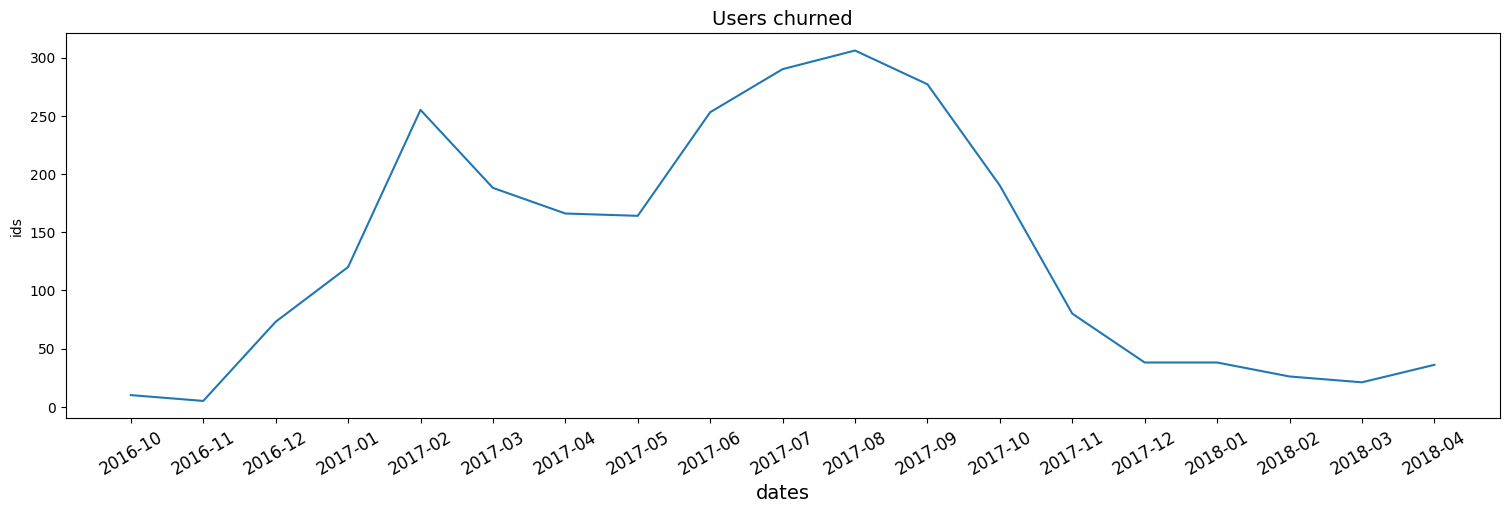

In [182]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15,5))
churn_table['churn'].plot()

plt.xlabel('dates', fontsize=14)
# ax = plt.gca()
plt.xticks(np.arange(0, len(dates), 1.0))
ax.set_xticklabels(churn_table['months'], fontsize=12, rotation=30)
plt.tight_layout()

plt.ylabel('ids')
plt.xlabel('dates')
plt.title('Users churned', fontsize=14)
# plt.savefig('../data/mean_check/results/churn.png', dpi=300, bbox_inches='tight')
plt.show()

# отправка файлов на почту


In [ ]:
def send_email(mail_from, password, subject):  

    """
    Эта функция посылает файл/файлы по почте указаным адресам.
    
    1) Константы и переменные которые остаются неизменными, либо меняются нечасто.
    2) Параметры для письма.
    3) Список всех путей до документов, которые нужно послать.
    4) Цикл для присоединения документов к письму.
    5) Цикл для посылки письма. Тестирует на соединение и посылает письмо.
    
    """
    import smtplib, os, sys
    from email.mime.multipart import MIMEMultipart
    from email.mime.text import MIMEText
    from email.mime.base import MIMEBase
    from email import encoders
    
    # 1
    RESULTS_PATH = '../data/mean_check/'
    SENDER = str(mail_from)
    PASSWORD = str(password)
    RECEPIENTS = 'mary_ua@outlook.com', 'mary24ua@gmail.com', 'zzabaras@gmail.com'
    COMMASPACE = ', '
    
    # 2
    outer = MIMEMultipart()
    outer['Subject'] = subject
    outer['To'] =  COMMASPACE.join(RECEPIENTS) #RECEPIENTS
    outer['From'] = SENDER
    #outer.preamble = ''

    # 3
    ATTACHEMENTS = ['../data/mean_check/results/report.xlsx',
                    '../data/mean_check/results/churn.csv',
                   '../data/mean_check/results/churn.png'] 

    # 4
    for file in ATTACHEMENTS:
        try:
            with open(file, 'rb') as fp:
                msg = MIMEBase('application', "octet-stream")
                msg.set_payload(fp.read())
            encoders.encode_base64(msg)
            msg.add_header('Content-Disposition', 'attachment', filename=os.path.basename(file))
            outer.attach(msg)
        except:
            print("Unable to open one of the attachments. Error: ", sys.exc_info()[0])
            raise

    COMPOSED = outer.as_string()

    # 5
    try:
        with smtplib.SMTP('smtp.gmail.com', 587) as s:
            s.ehlo()
            s.starttls()
            s.ehlo()
            s.login(SENDER, PASSWORD)
            s.sendmail(SENDER, RECEPIENTS, COMPOSED)
            s.close()
    except:
        print("Unable to send the email. Error: ", sys.exc_info()[0])
        raise

<div class="alert alert-info"> Голубе оформлення

<div class="alert alert-success"> Green

<div class="alert alert-warning"> warning

<div class="alert alert-danger"> danger

<div class="alert"> dangerimd

<a name="твоё_название"></a> 

In [184]:
import xlsxwriter

ModuleNotFoundError: No module named 'xlsxwriter'